In [2]:
import csv as csv

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def readCrashData(accYearStart, accYearEnd, nrows=None):
    dir = 'NHTSA-FARS-download/'
    usecols = ['MOD_YEAR', 'MAKE', 'MODEL', 'DEATHS']

    df_final = None
    for accYear in range(accYearStart, accYearEnd + 1):

        print( accYear,'', end='')
        df = pd.read_csv(
            f'{dir}vehicle{accYear}.csv', encoding='latin1', header=0, usecols=usecols, nrows=nrows)  
            #.astype(str)      # , dtype={'DEATHS':'int32'}        

        df['ACC_YEAR'] = accYear
        if df_final is None:
            df_final = df
        else:
            df_final = pd.concat([df_final, df], ignore_index=True)
    
    print('')
    df_final = df_final.rename(columns = {'MAKE':'Make_ID', 'MODEL':'Model_ID'})

    return df_final



def aggregate(df_final, filterCondition='MOD_YEAR>=1999', groupBy=['MOD_YEAR', 'Make_ID', 'Model_ID','ACC_YEAR']):
    print('filtering by',filterCondition, ', aggregating by',groupBy)

    df_agg = df_final.query(filterCondition).groupby(groupBy) \
        .agg(fatalities=pd.NamedAgg(column='DEATHS', aggfunc=sum)) \
        .reset_index()

    return df_agg


if __name__ == '__main__':
    
#     df_agg = aggregate( readCrashData(accYearStart=2000, accYearEnd=2020)
#                        ,filterCondition = 'MOD_YEAR>=1999'
#                        ,groupBy = ['MOD_YEAR', 'Make_ID', 'Model_ID','ACC_YEAR']
#                       )
#     df_agg.to_pickle( 'master_aggregate.pkl')
    
    # test
    df_agg = pd.read_pickle('master_aggregate.pkl')
    print(df_agg[:5])

   MOD_YEAR  Make_ID  Model_ID  ACC_YEAR  fatalities
0      1999        2       403      2000          13
1      1999        2       403      2001          11
2      1999        2       403      2002           9
3      1999        2       403      2003          11
4      1999        2       403      2004          20


In [4]:
def getSales( verbose=False, nrows = None):
    dir = ''

    df_original = pd.read_csv(f'{dir}car_sales_ID_NoOther.csv', encoding='latin1', header=0, nrows=nrows)

    df_melted = pd.melt(df_original
                        , id_vars = ['Make_Name', 'Model_Name','Model_ID','Make_ID']
                        , value_vars = [str(x) for x in range(2005,2021+1)]
                        , var_name = 'Sales_Year'
                        , value_name = 'Sales'
                       ).astype( {'Model_ID':'int32','Make_ID':'int32', 'Sales_Year':'int32', 'Sales':'int32'})  
    
    if verbose:
              
        print("df_original number of records is ", len(df_original))
#         print(df_original.dtypes)  
        
        print("df_melted number of records is ", len(df_melted))
#         print(df_melted.dtypes)

#         print(df_melted[5500:5520])
#         print(df_melted.query('Sales!="0"')[:20])
        print(df_melted.query('Make_Name=="Acura" and Model_Name=="MDX"'))
        print(df_melted.query('Make_Name=="Tesla" or  Model_Name=="Tesla"'))
        
        test2 = df_melted.query('Make_ID==49 and Model_ID==40 and Sales_Year==2005')
        print(test2)
        print(test2.dtypes)

    return df_melted



# def joinCrashSales( dfCrash, dfSales):
#     dfCrashSales = dfCrash.merge( dfSales, on=['Make_ID','Model_ID'], how='left')
#     print(dfCrashSales.query('Make_Name=="Acura" and Model_Name=="MDX"'))
    
#     return dfCrashSales

    

if __name__ == '__main__':
    dfSales = getSales(verbose=True)
#     dfCrashSales = joinCrashSales( df_agg, df_sales)


df_original number of records is  607
df_melted number of records is  10319
     Make_Name Model_Name  Model_ID  Make_ID  Sales_Year  Sales
3        Acura        MDX       421       54        2005  57948
610      Acura        MDX       421       54        2006  54121
1217     Acura        MDX       421       54        2007  58606
1824     Acura        MDX       421       54        2008  45377
2431     Acura        MDX       421       54        2009  31178
3038     Acura        MDX       421       54        2010  47210
3645     Acura        MDX       421       54        2011  43271
4252     Acura        MDX       421       54        2012  50854
4859     Acura        MDX       421       54        2013  53040
5466     Acura        MDX       421       54        2014  65603
6073     Acura        MDX       421       54        2015  58208
6680     Acura        MDX       421       54        2016  55495
7287     Acura        MDX       421       54        2017  54886
7894     Acura        MDX   

In [5]:
# df_sales:  
#      Make_Name Model_Name  Model_ID  Make_ID  Sales_Year  Sales
# 3        Acura        MDX       421       54        2005  57948
# 610      Acura        MDX       421       54        2006  54121
# 1217     Acura        MDX       421       54        2007  58606

def lookupSales(dfSales, Sales_Year, Make_ID, Model_ID, verbose=False ):
    
    condition = []
    if Sales_Year != None:
        condition.append(f'Sales_Year>={Sales_Year}')
    if Make_ID != None:
        condition.append(f'Make_ID=={Make_ID}')
    if Model_ID != None:
        condition.append(f'Model_ID=={Model_ID}')
    
    condition = ' and '.join(condition)
    
        
    df = dfSales.query(condition)
#     df = dfSales.query(f'Sales_Year>={Sales_Year} and Make_ID=={Make_ID} and Model_ID=={Model_ID}')
        
    if df.empty:
        year, sales = None, None
    else:
        year, sales = df.Sales_Year.tolist()[0], df.Sales.tolist()[0]

                
    if verbose:
        print(condition)
#         print(df)
        print('year',year,'sales',sales)
        print()

    return year, sales

year, sales = lookupSales(dfSales, Sales_Year=2005, Make_ID=49, Model_ID=40, verbose=True)
year, sales = lookupSales(dfSales, 2005, 49, 4000 , True)
year, sales = lookupSales(dfSales, 2005, None, 40 , True)

    

Sales_Year>=2005 and Make_ID==49 and Model_ID==40
year 2005 sales 431703

Sales_Year>=2005 and Make_ID==49 and Model_ID==4000
year None sales None

Sales_Year>=2005 and Model_ID==40
year 2005 sales 17



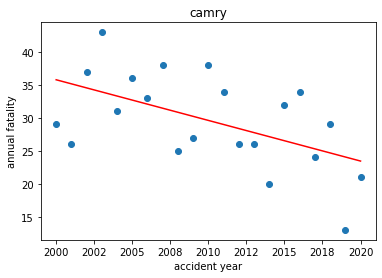

Slope -0.6168831168831609 intercept 1269.554112554201
Initial fatality rate is 35.78787878787921 per year


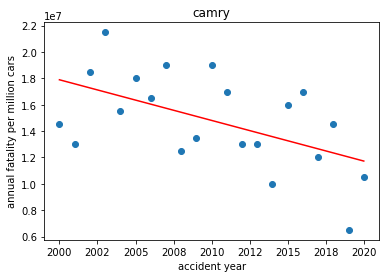

Slope -308441.55844158056 intercept 634777056.2771009
Initial fatality rate is 17893939.393939734 per year


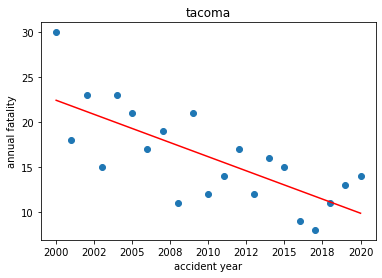

Slope -0.6285714285714206 intercept 1279.5714285714128
Initial fatality rate is 22.42857142857156 per year


(-0.6285714285714206, 1279.5714285714128, 22.42857142857156)

In [41]:
def linear_regress(df_agg, name, filterCondition, denom=None, showPlot=True):
    k = name
    v = df_agg.query(filterCondition)
    
    if v.empty:
        return None,None,None
    
    # start of linear regression calculation
    # create lists for year and fatalities to iterate through
    x_years = v['ACC_YEAR'].to_list()
    y_fatal = v['fatalities'].to_list()
    
    if denom != None:
        y_fatal = [y/(denom/1e6) for y in y_fatal]
        permillion = ' per million cars'
    else:
        permillion = ''
    
    yearOne = min(x_years)

    # find number of years of data
    num_years = len(x_years)

    # get regression coefficients for all data provided at least 2 years of data
    # otherwise coefficients = None and assign coefficients to coeff_all dictionary

    slope, intercept, initFatality = None, None, None
    if num_years > 1:
        slope, intercept = np.polyfit(x_years, y_fatal, 1)
        y_cal2 = []
        for m in range(len(x_years)):
            y_cal2.append(x_years[m]*slope + intercept)

    # print linear regression on top of scatter plot (if slope != None)
    if  slope != None:   
        initFatality = slope * yearOne + intercept
        
        if showPlot:
            
            fig,ax = plt.subplots()
            ax.scatter(x_years,y_fatal)
            ax.set_title(k)
            
            ax.plot(x_years, y_cal2, 'r') 
            ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:4.0f}'))
            ax.xaxis.set_label_text('accident year')
            ax.yaxis.set_label_text('annual fatality' + permillion)

            plt.show()        
            print(f'Slope {slope} intercept {intercept}')
            print(f'Initial fatality rate is {initFatality} per year')
    
    return slope, intercept, initFatality


linear_regress(df_agg,'camry' , "MOD_YEAR==1999 and Make_ID==49 and Model_ID==40  ")  
linear_regress(df_agg,'camry' , "MOD_YEAR==1999 and Make_ID==49 and Model_ID==40  ", denom=2)  


# linear_regress(df_agg,'camry'        , "MOD_YEAR==1999 and Make_ID==49 and Model_ID==40  ")  
linear_regress(df_agg,'tacoma'       , "MOD_YEAR==1999 and Make_ID==49 and Model_ID==472 ")
# linear_regress(df_agg,'mustang'      , "MOD_YEAR==1999 and Make_ID==12 and Model_ID==3   ")
# linear_regress(df_agg,'ford_f_series', "MOD_YEAR==1999 and Make_ID==12 and Model_ID==481 ")
# linear_regress(df_agg,'crown_vicoria', "MOD_YEAR==1999 and Make_ID==12 and Model_ID==16  ")

# df_agg = aggregate(df_final, ['MOD_YEAR', 'Make_ID','YEAR'])
# linear_regress(df_agg,'toyota', "MOD_YEAR==1999 and Make_ID==49 ")
# linear_regress(df_agg,'ford'  , "MOD_YEAR==1999 and Make_ID==12 ")
    

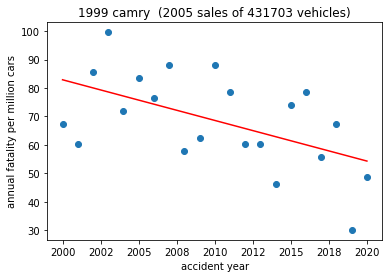

Slope -1.4289525828710028 intercept 2940.804471023367
Initial fatality rate is 82.89930528136165 per year


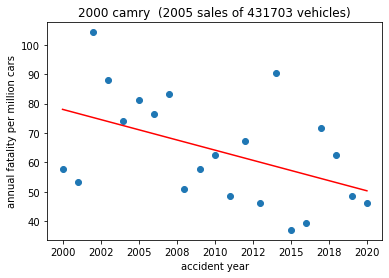

Slope -1.3838277644645731 intercept 2845.6913815600346
Initial fatality rate is 78.03585263088826 per year


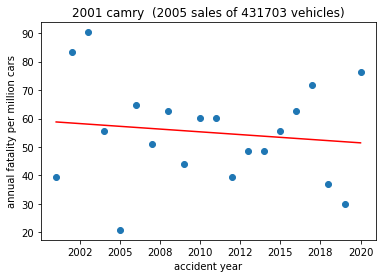

Slope -0.3866484440298942 intercept 832.4871915298746
Initial fatality rate is 58.80365502605639 per year


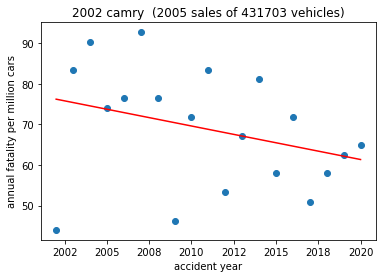

Slope -0.8249661245745121 intercept 1727.7675998090035
Initial fatality rate is 76.18541841083015 per year


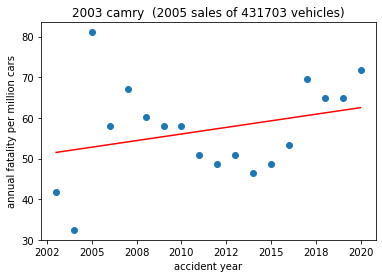

Slope 0.6478290923201895 intercept -1246.0988606590092
Initial fatality rate is 51.50281125833021 per year


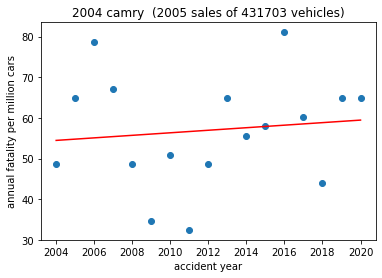

Slope 0.3122607940380777 intercept -571.3123487720641
Initial fatality rate is 54.458282480243724 per year


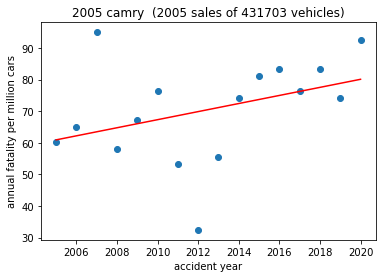

Slope 1.277430521065009 intercept -2500.323275084021
Initial fatality rate is 60.92491965132194 per year


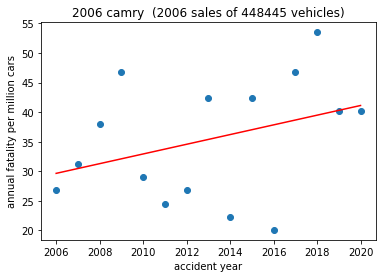

Slope 0.820294892031664 intercept -1615.872095585311
Initial fatality rate is 29.639457830206993 per year


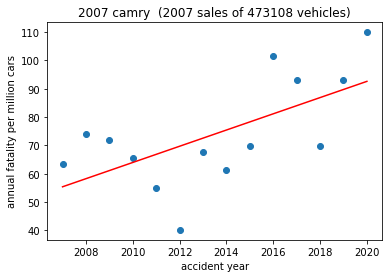

Slope 2.861600636315851 intercept -5687.854001135389
Initial fatality rate is 55.37847595052335 per year


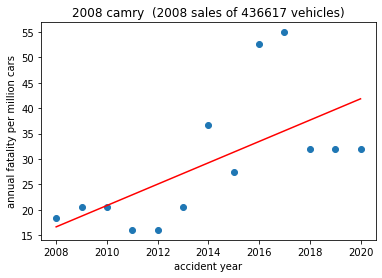

Slope 2.1015728145776733 intercept -4203.321808912259
Initial fatality rate is 16.6364027597092 per year


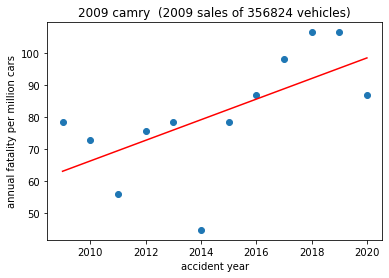

Slope 3.214058322459225 intercept -6393.9150141313885
Initial fatality rate is 63.1281556891945 per year


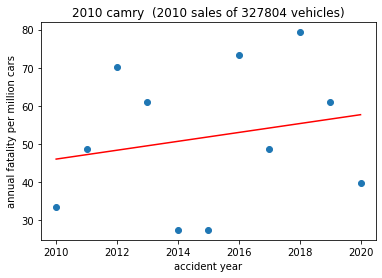

Slope 1.1647758472081302 intercept -2295.163074165357
Initial fatality rate is 46.03637872298441 per year


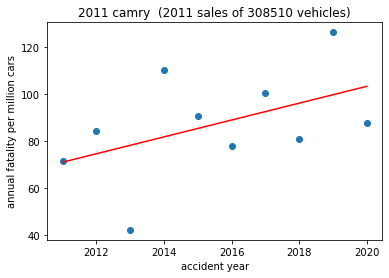

Slope 3.594991763933174 intercept -7158.512616359141
Initial fatality rate is 71.01582091047112 per year


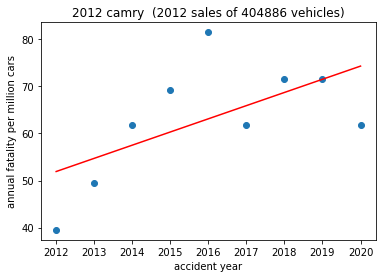

Slope 2.7991418160503496 intercept -5579.9519974622535
Initial fatality rate is 51.921336431049895 per year


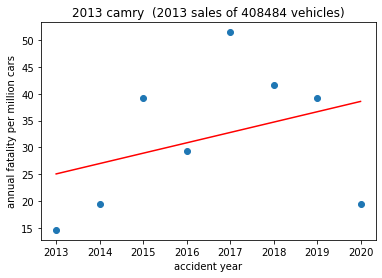

Slope 1.9234885227188812 intercept -3846.8896141412765
Initial fatality rate is 25.092782091831396 per year


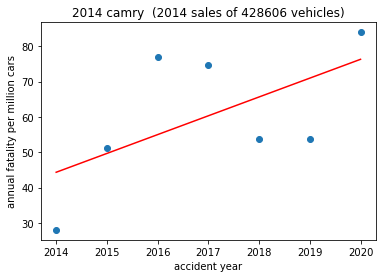

Slope 5.332903145812696 intercept -10696.137178267198
Initial fatality rate is 44.32975739957146 per year


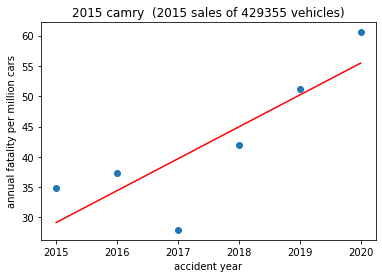

Slope 5.2570550177408375 intercept -10563.796968982666
Initial fatality rate is 29.16889176512086 per year


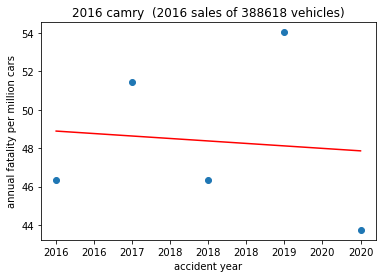

Slope -0.2573221003659705 intercept 567.6525534073195
Initial fatality rate is 48.891199069523054 per year


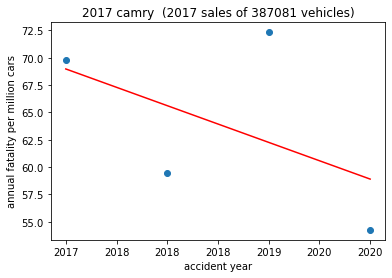

Slope -3.358470190994072 intercept 6843.012186080834
Initial fatality rate is 68.97781084579037 per year


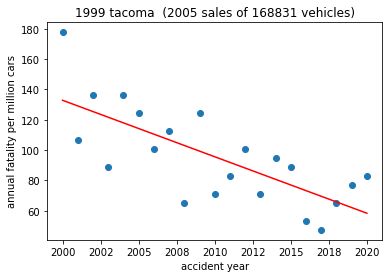

Slope -3.72308064615752 intercept 7579.0075790074825
Initial fatality rate is 132.84628669244285 per year


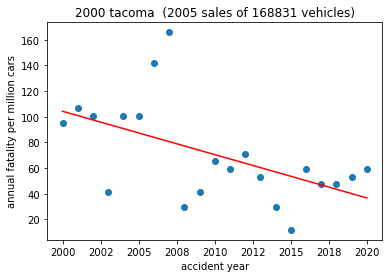

Slope -3.376926453849669 intercept 6858.135063263548
Initial fatality rate is 104.28215556420946 per year


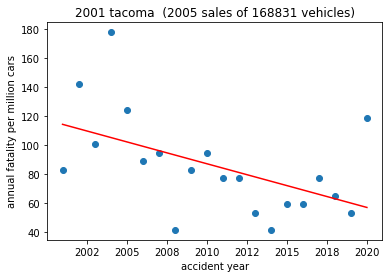

Slope -3.014982772067561 intercept 6147.211410368836
Initial fatality rate is 114.23088346164695 per year


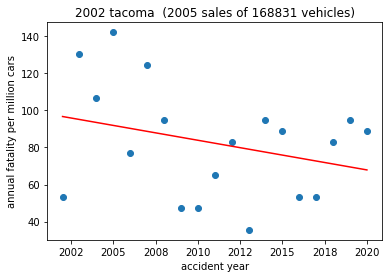

Slope -1.6002715058045383 intercept 3300.4456756143045
Initial fatality rate is 96.70212099361879 per year


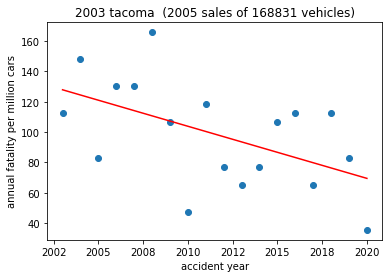

Slope -3.4352657993205935 intercept 7008.755202769368
Initial fatality rate is 127.91780673021913 per year


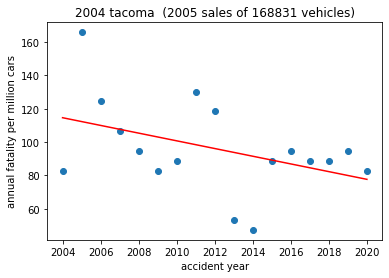

Slope -2.30826022681241 intercept 4740.382568437163
Initial fatality rate is 114.62907390509372 per year


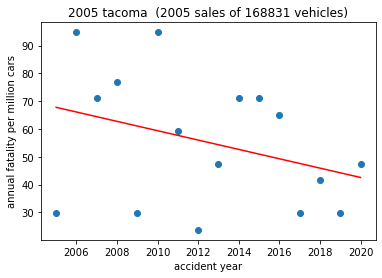

Slope -1.6811102783957597 intercept 3438.39314427633
Initial fatality rate is 67.76703609283186 per year


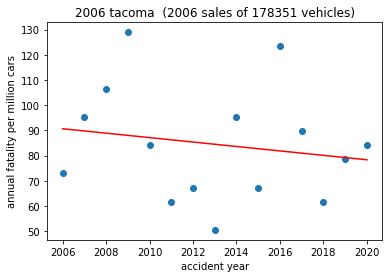

Slope -0.8810876145511198 intercept 1858.1069805896045
Initial fatality rate is 90.64522580005814 per year


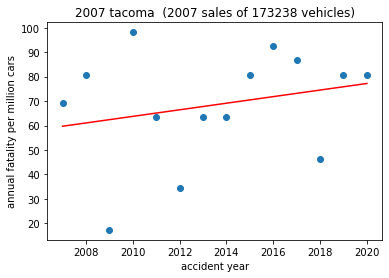

Slope 1.3447802039218795 intercept -2639.2707028593545
Initial fatality rate is 59.70316641185764 per year


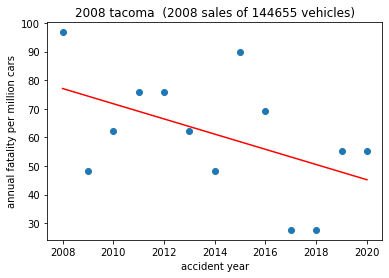

Slope -2.6588461139634614 intercept 5416.069534143572
Initial fatality rate is 77.10653730494141 per year


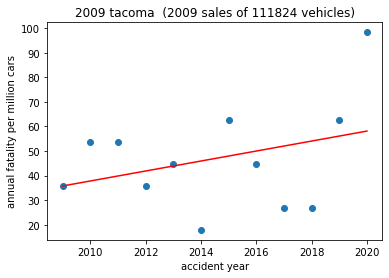

Slope 2.032414573550748 intercept -4047.3503817689607
Initial fatality rate is 35.77049649449191 per year


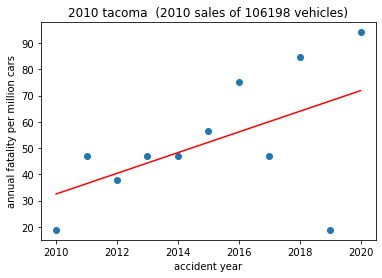

Slope 3.937756061148048 intercept -7882.360393706782
Initial fatality rate is 32.529289200794665 per year


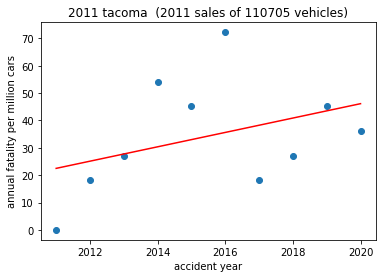

Slope 2.627786377390933 intercept -5261.977984076755
Initial fatality rate is 22.500420856411438 per year


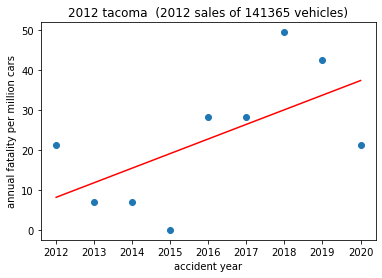

Slope 3.6548414859882743 intercept -7345.36680067846
Initial fatality rate is 8.174269129947788 per year


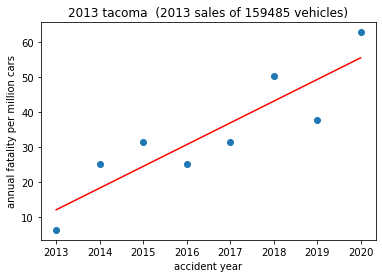

Slope 6.195537123210824 intercept -12459.598379904879
Initial fatality rate is 12.01784911850882 per year


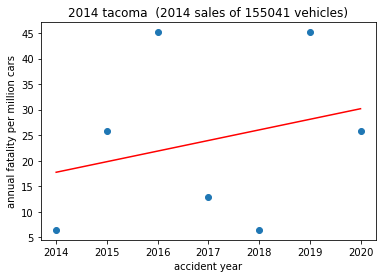

Slope 2.073184328200469 intercept -4157.655993298915
Initial fatality rate is 17.737243696829864 per year


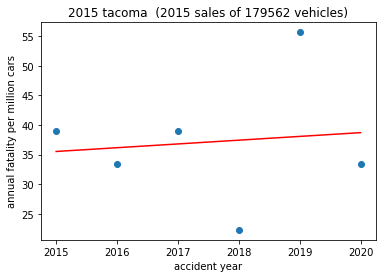

Slope 0.636469377070869 intercept -1246.949587911306
Initial fatality rate is 35.536206886495165 per year


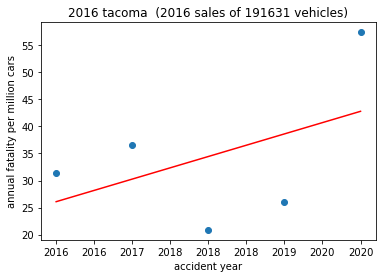

Slope 4.174689898816351 intercept -8390.083024146159
Initial fatality rate is 26.09181186760543 per year


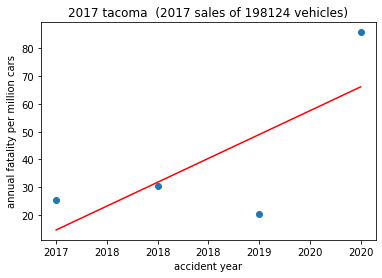

Slope 17.16096989764146 intercept -34599.038985688945
Initial fatality rate is 14.637297853885684 per year


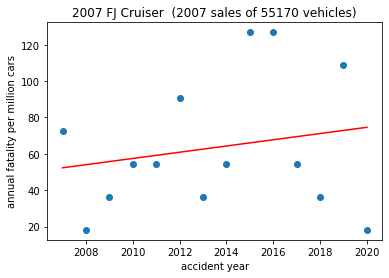

Slope 1.7129870310944715 intercept -3385.6591115966635
Initial fatality rate is 52.30585980994056 per year


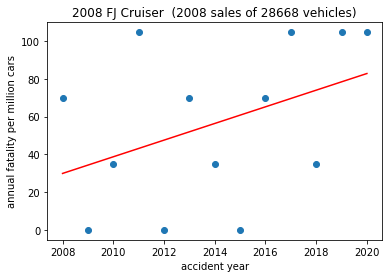

Slope 4.408177283857939 intercept -8821.721044409278
Initial fatality rate is 29.89894157746312 per year


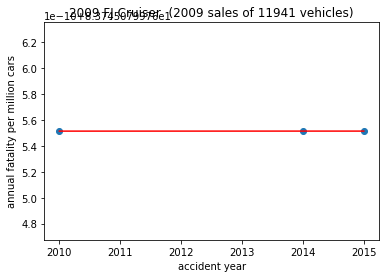

Slope 5.587956310526812e-15 intercept 83.74507997654005
Initial fatality rate is 83.74507997655128 per year


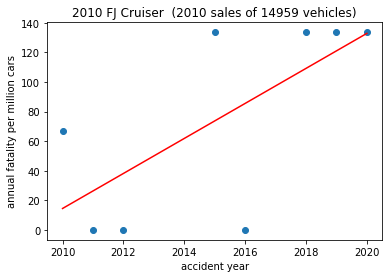

Slope 11.845678476972042 intercept -23795.317279039165
Initial fatality rate is 14.496459674639482 per year


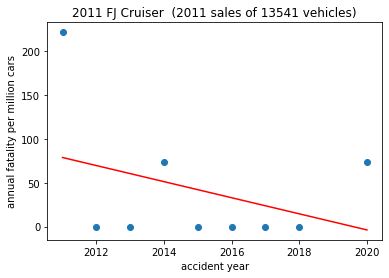

Slope -9.171667409129789 intercept 18522.956564402055
Initial fatality rate is 78.73340464205103 per year


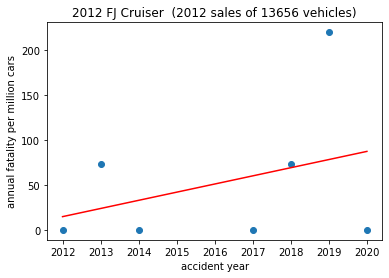

Slope 9.064616854642233 intercept -18223.25689195321
Initial fatality rate is 14.752219586964202 per year


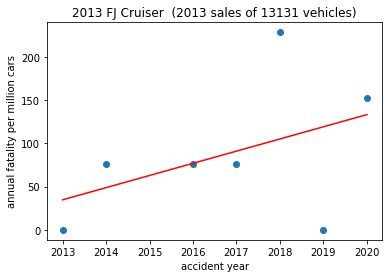

Slope 14.07224192336022 intercept -28292.656276384037
Initial fatality rate is 34.7667153400871 per year


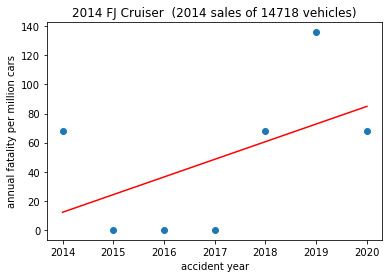

Slope 12.132859666489622 intercept -24423.446508643596
Initial fatality rate is 12.132859666504373 per year


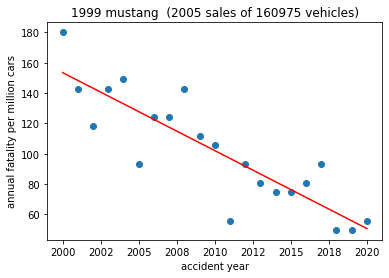

Slope -5.14720564417728 intercept 10447.940008430885
Initial fatality rate is 153.52872007632504 per year


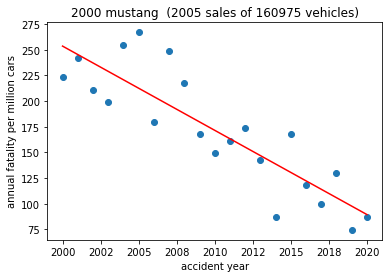

Slope -8.204871692991288 intercept 16663.365624385064
Initial fatality rate is 253.6222384024877 per year


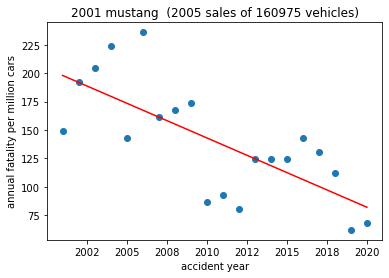

Slope -6.104716675988307 intercept 12413.616741028514
Initial fatality rate is 198.078672375912 per year


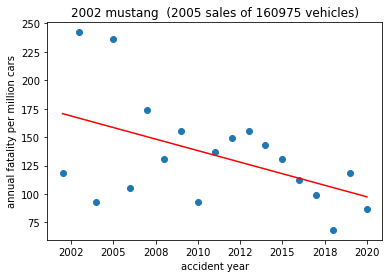

Slope -4.065140331804767 intercept 8309.048751713006
Initial fatality rate is 170.63780743986172 per year


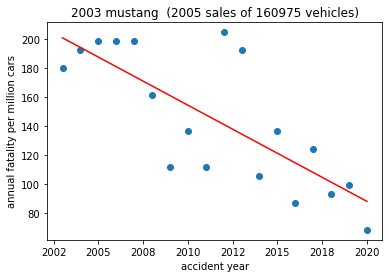

Slope -6.648084724935327 intercept 13517.227349057714
Initial fatality rate is 201.11364501225398 per year


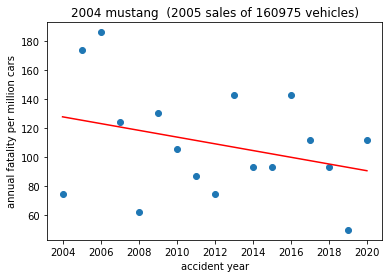

Slope -2.3295542786149643 intercept 4796.3238719938245
Initial fatality rate is 127.89709764943564 per year


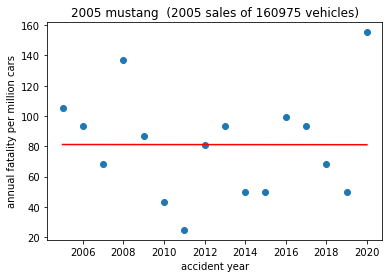

Slope -0.009135506974643454 intercept 99.53134849154839
Initial fatality rate is 81.21465700738825 per year


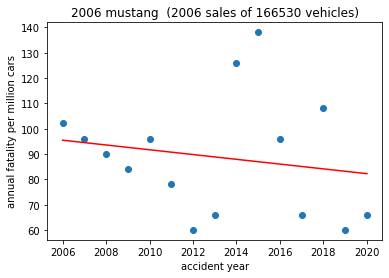

Slope -0.9436309202117211 intercept 1988.4019181443152
Initial fatality rate is 95.47829219960272 per year


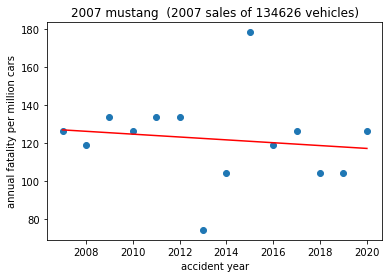

Slope -0.7509611895095467 intercept 1634.0915483727597
Initial fatality rate is 126.91244102709948 per year


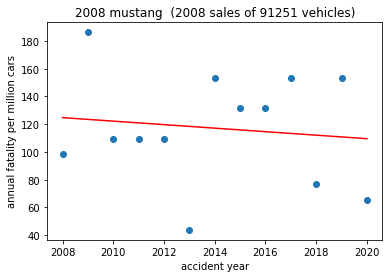

Slope -1.264475078461011 intercept 2663.827498624499
Initial fatality rate is 124.76154107478897 per year


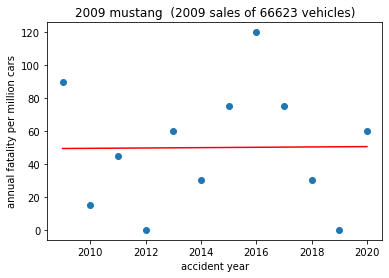

Slope 0.10496385622118382 intercept -161.41691689226494
Initial fatality rate is 49.45547025609335 per year


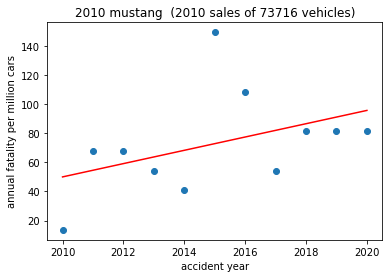

Slope 4.562966470829229 intercept -9121.616622023888
Initial fatality rate is 49.945984342863085 per year


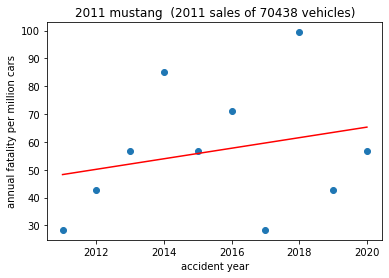

Slope 1.8929176486172903 intercept -3758.3879913296187
Initial fatality rate is 48.26940003975187 per year


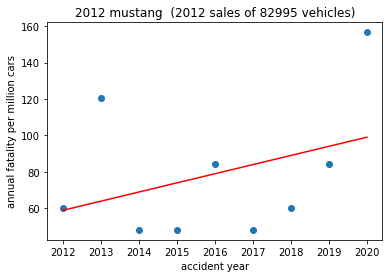

Slope 5.020382753982024 intercept -10042.10427669846
Initial fatality rate is 58.90582431337316 per year


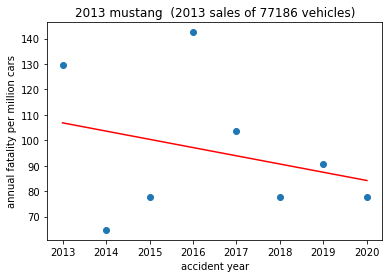

Slope -3.2389293395169734 intercept 6626.849428651748
Initial fatality rate is 106.8846682040803 per year


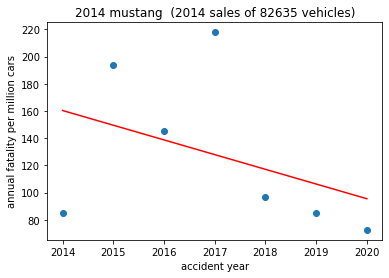

Slope -10.80483019128635 intercept 21921.27168528942
Initial fatality rate is 160.34368003870986 per year


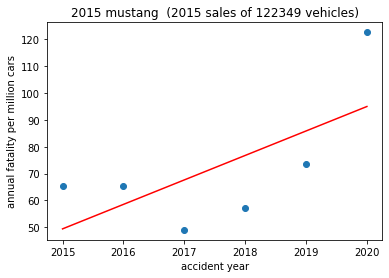

Slope 9.107436221671776 intercept -18302.054738798837
Initial fatality rate is 49.42924786978983 per year


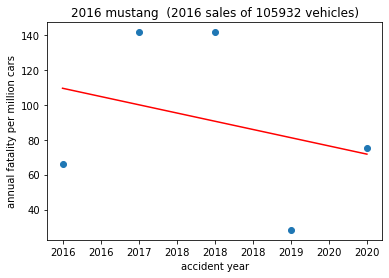

Slope -9.440018124835769 intercept 19140.580749916986
Initial fatality rate is 109.50421024807656 per year


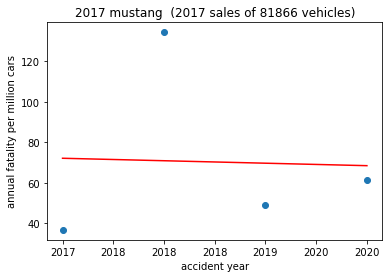

Slope -1.2215083184699727 intercept 2535.851269143758
Initial fatality rate is 72.06899078982315 per year


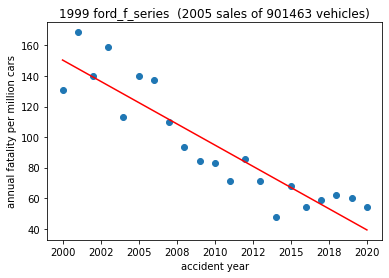

Slope -5.560945943413346 intercept 11272.320757014448
Initial fatality rate is 150.42887018775582 per year


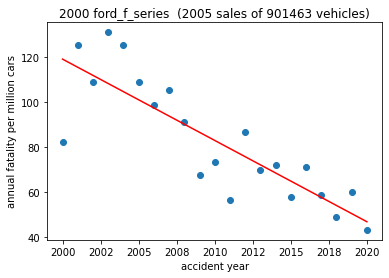

Slope -3.6045302462229216 intercept 7328.039764202327
Initial fatality rate is 118.9792717564842 per year


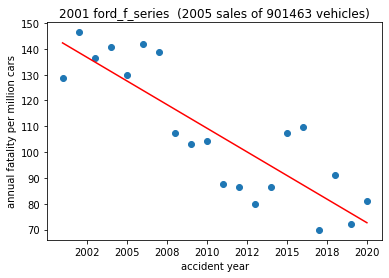

Slope -3.6648862998215725 intercept 7475.745838349787
Initial fatality rate is 142.30835240682063 per year


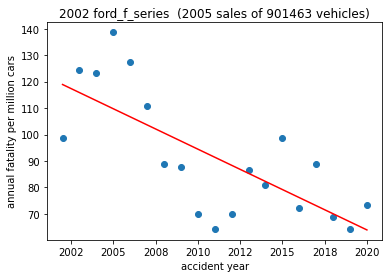

Slope -3.0535158724732483 intercept 6232.050741843764
Initial fatality rate is 118.91196515232059 per year


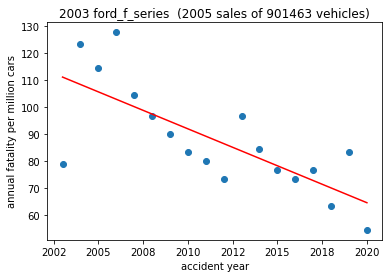

Slope -2.7372085821179497 intercept 5593.592012838964
Initial fatality rate is 110.96322285671067 per year


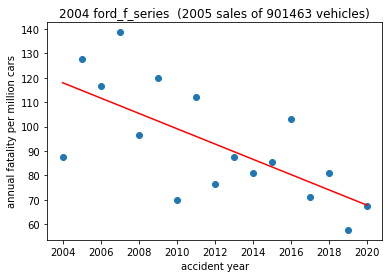

Slope -3.134882288188249 intercept 6400.3040112598355
Initial fatality rate is 117.99990573058494 per year


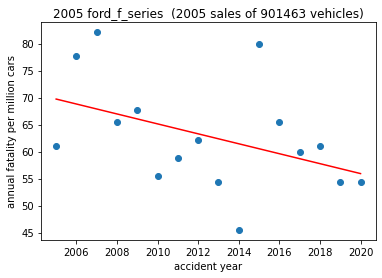

Slope -0.9200729976782105 intercept 1914.4614659401561
Initial fatality rate is 69.71510559534408 per year


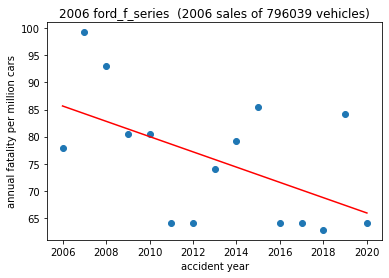

Slope -1.4087608414015063 intercept 2911.6275052085753
Initial fatality rate is 85.6532573571535 per year


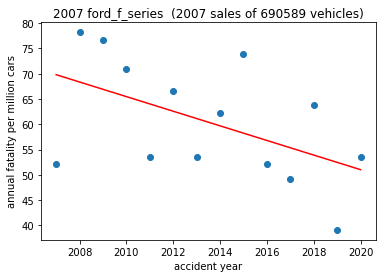

Slope -1.4448567784921635 intercept 2969.623047845916
Initial fatality rate is 69.79549341214397 per year


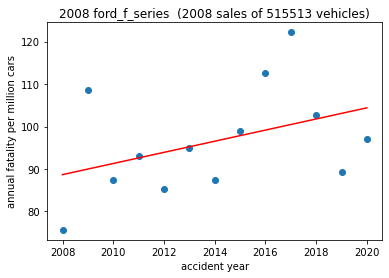

Slope 1.3109740701478914 intercept -2543.7586624209425
Initial fatality rate is 88.67727043602326 per year


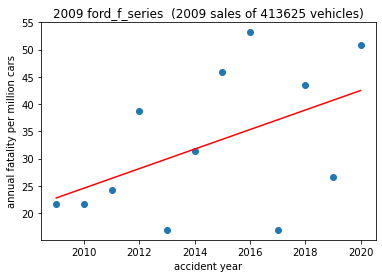

Slope 1.7921033333545167 intercept -3577.5539057498354
Initial fatality rate is 22.78169095938847 per year


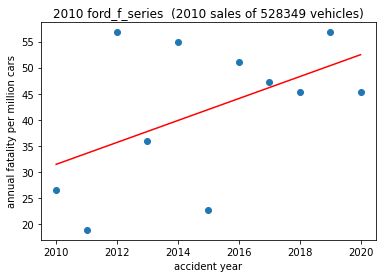

Slope 2.0991634489530377 intercept -4187.831080661307
Initial fatality rate is 31.487451734298702 per year


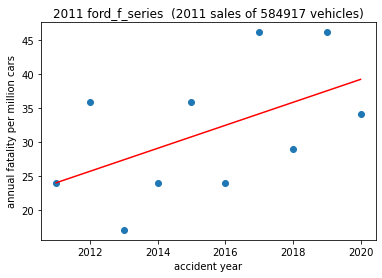

Slope 1.688921313415242 intercept -3372.392488113578
Initial fatality rate is 24.02827316447383 per year


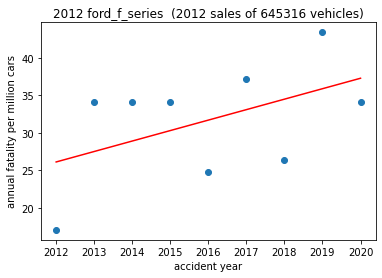

Slope 1.3946655591988755 intercept -2779.964475629798
Initial fatality rate is 26.102629478339622 per year


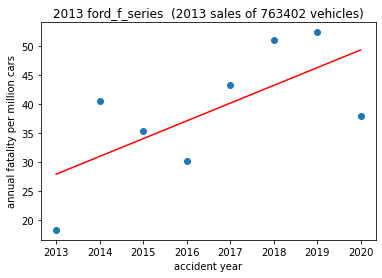

Slope 3.056493607998532 intercept -6124.776548485058
Initial fatality rate is 27.945084415987367 per year


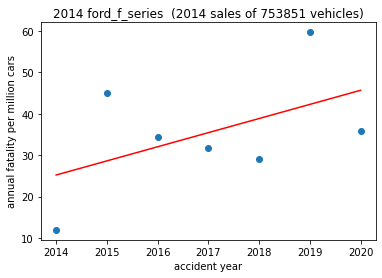

Slope 3.411056788978642 intercept -6844.664453395528
Initial fatality rate is 25.203919607456555 per year


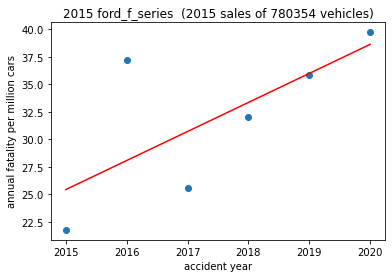

Slope 2.6361662234610406 intercept -5286.428613533638
Initial fatality rate is 25.446326740358927 per year


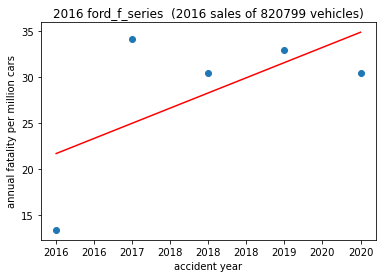

Slope 3.2894776918584325 intercept -6609.900840521749
Initial fatality rate is 21.68618626485113 per year


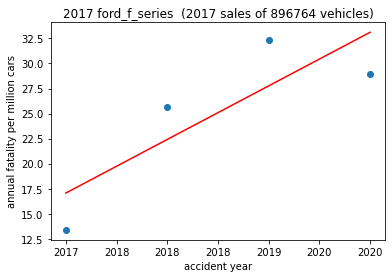

Slope 5.352578827875307 intercept -10779.090150810644
Initial fatality rate is 17.06134501385168 per year


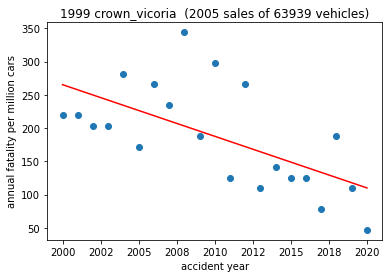

Slope -7.759018691313848 intercept 15783.30645097471
Initial fatality rate is 265.2690683470137 per year


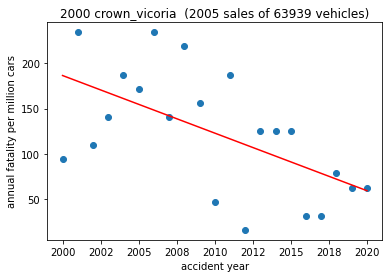

Slope -6.377832117991184 intercept 12942.327539053504
Initial fatality rate is 186.6633030711364 per year


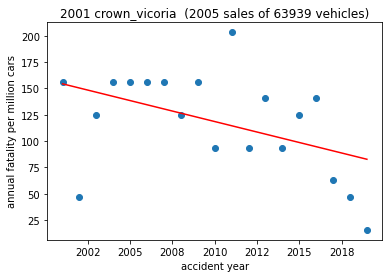

Slope -3.9785727789342533 intercept 8115.465316037136
Initial fatality rate is 154.34118538969506 per year


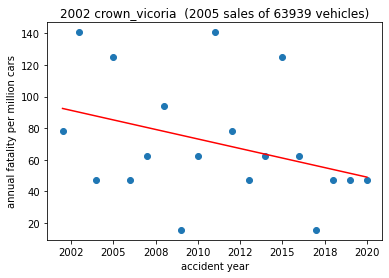

Slope -2.4145821003187287 intercept 4926.515760773035
Initial fatality rate is 92.5223959349405 per year


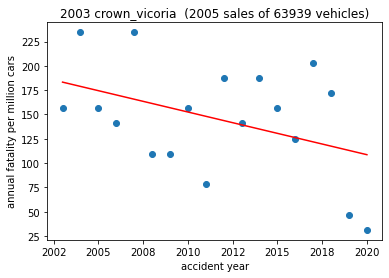

Slope -4.39014927330665 intercept 8976.757726593778
Initial fatality rate is 183.28873216055763 per year


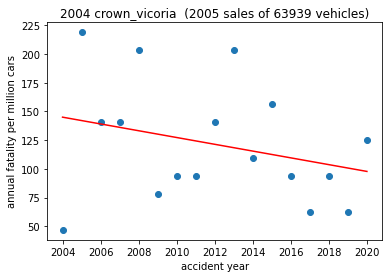

Slope -2.951649074838531 intercept 6060.157214797039
Initial fatality rate is 145.05246882062238 per year


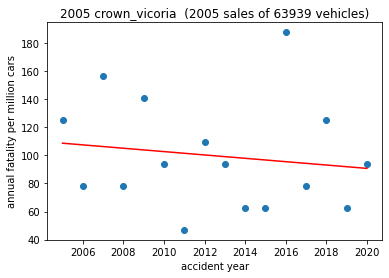

Slope -1.1959928718823563 intercept 2506.640060424985
Initial fatality rate is 108.67435230086085 per year


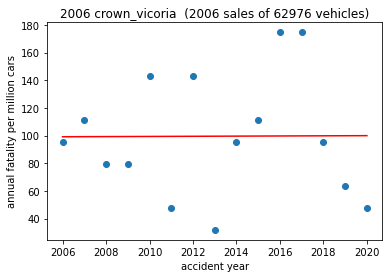

Slope 0.056710946573792595 intercept -14.650327864968554
Initial fatality rate is 99.11183096205939 per year


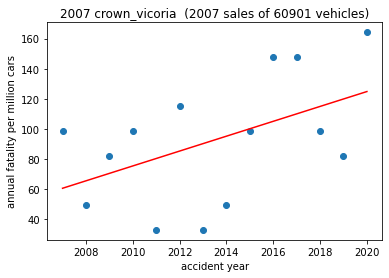

Slope 4.944071543962773 intercept -9862.231822461557
Initial fatality rate is 60.51976627172735 per year


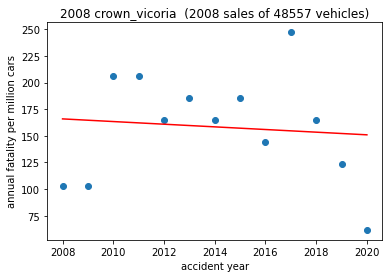

Slope -1.2447136445745548 intercept 2665.271380391612
Initial fatality rate is 165.886382085906 per year


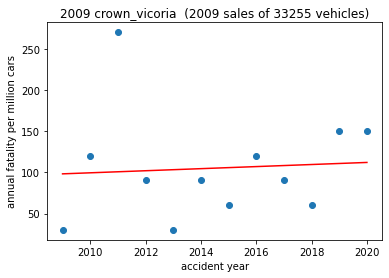

Slope 1.2617062684722085 intercept -2436.459946608877
Initial fatality rate is 98.30794675178959 per year


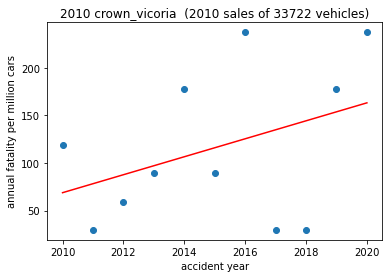

Slope 9.435437345998924 intercept -18896.485164794107
Initial fatality rate is 68.74390066372871 per year


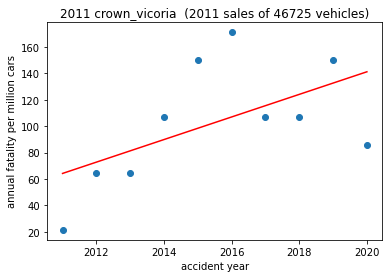

Slope 8.56072766185112 intercept -17151.417870518722
Initial fatality rate is 64.2054574638787 per year


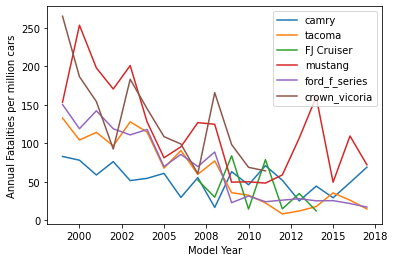

In [43]:
def summarize_by_modelyear( df_agg, dfSales=None, normalize=False ):

#     df_agg = aggregate(df_final, ['MOD_YEAR', 'Make_ID', 'Model_ID','ACC_YEAR'])
    x = {}
    x['camry' ]        = {'Make_ID':49, 'Model_ID':40 }   
    x['tacoma']        = {'Make_ID':49, 'Model_ID':472}   
    x['FJ Cruiser']    = {'Make_ID':49, 'Model_ID':404}   
    x['mustang']       = {'Make_ID':12, 'Model_ID':3  } 
    x['ford_f_series'] = {'Make_ID':12, 'Model_ID':481}   
    x['crown_vicoria'] = {'Make_ID':12, 'Model_ID':16 }  

    modelYrStart, modelYrEnd = 1999,2017
    
    series={}
    for modelName,ID in x.items():
        Make_ID  = ID['Make_ID']
        Model_ID = ID['Model_ID']
        condition = f'Make_ID=={Make_ID} and Model_ID=={Model_ID}'
        
        x,y=[],[]
        for modelYear in range(modelYrStart, modelYrEnd + 1):
            
            if normalize and not dfSales.empty:
                year, sales = lookupSales(
                    dfSales, Sales_Year=modelYear, Make_ID=Make_ID, Model_ID=Model_ID, verbose=False)
                
                # sales could be None if not found
                if sales != None:
                    salesTitle = f' ({year} sales of {sales} vehicles)'
            else:
                sales = None
                salesTitle = ''
            
            if not (normalize and sales==None):
                _,_, initFatality = linear_regress(
                      df_agg          = df_agg
                    , name            = f'{modelYear} {modelName} {salesTitle}'
                    , filterCondition = f'MOD_YEAR=={modelYear} and ACC_YEAR>=MOD_YEAR and '+condition
                    , denom           = sales
                    , showPlot        = (modelYear>=modelYrStart)
                    )

                if initFatality != None:
                    x.append(modelYear)
                    y.append(initFatality)
        
        series[modelName] = [x,y]

    fig, ax = plt.subplots()

    for modelName,data in series.items():
        ax.plot(data[0], data[1], label=modelName)
    
    if normalize:
        permillion = ' per million cars'
    else:
        permillion = ''
    
    ax.set_xlabel('Model Year')  # Add an x-label to the axes.
    ax.set_ylabel('Annual Fatalities' + permillion)  # Add a y-label to the axes.
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:4.0f}'))
    ax.legend()

summarize_by_modelyear( df_agg, dfSales, normalize=True )    

# fig, ax = plt.subplots()  # Create a figure and an axes.
# ax.plot(x, x, label='linear')  # Plot some data on the axes.
# ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
# ax.plot(x, x**3, label='cubic')  # ... and some more.
# ax.set_xlabel('x label')  # Add an x-label to the axes.
# ax.set_ylabel('y label')  # Add a y-label to the axes.
# ax.set_title("Simple Plot")  # Add a title to the axes.
# ax.legend()  # Add a legend.
    